<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/K_Means_HandsOn_03_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Link:**https://drive.google.com/file/d/1dTF_L3yqZa20ezOomnlf0u-c-gwtFPO3/view?usp=drive_link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Cricket.csv',encoding='latin')
df


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [ ]:
df.sample(50)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
21,DL Haynes (WI),1978-1994,238,237,28,8648,152*,41.37,13707,63.09,17,57,13
19,S Chanderpaul (WI),1994-2011,268,251,40,8778,150,41.60,12408,70.74,11,59,6
44,Ijaz Ahmed (PAK),1986-2000,250,232,29,6564,139*,32.33,8174,80.30,10,37,14
68,DR Martyn (AUS),1992-2006,208,182,51,5346,144*,40.80,6877,77.73,5,37,10
46,LRPL Taylor (NZ),2006-2017,190,176,29,6486,131*,44.12,7906,82.03,17,37,9
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
52,DC Boon (AUS),1984-1995,181,177,16,5964,122,37.04,9157,65.13,5,37,6
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
26,HH Gibbs (SA),1996-2010,248,240,16,8094,175,36.13,9721,83.26,21,37,22


In [ ]:
# Check for basic info in this dataset, then check for null and duplicate values in
# the dataset


In [ ]:
df.isnull().sum()

,0
Player,0
Span,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [ ]:
df['HS']

,HS
0,200*
1,169
2,164
3,189
4,144
...,...
74,133*
75,96*
76,120*
77,156


In [ ]:
# Remove the "*" from HS column and convert the datatype from object to integer.

df['HS']=df['HS'].str.replace('*', '')
df['HS'] = df['HS'].astype(int)

In [ ]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.2+ KB


In [ ]:
# Split the span column with respect to "-" and create two new columns start and end.
df[['start','end']] = df['Span'].str.split('-',expand=True)
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     object 
 14  end     79 non-null     object 
dtypes: float64(2), int64(9), object(4)
memory usage: 9.4+ KB


In [ ]:
# Convert the datatype of both the new columns start and end into integer.
# Calculate exp from both the columns (end-start) and store it into new column.
# Drop these 3 columns:
#     Span , Start , End.

df['start'] = df['start'].astype(int)
df['end'] = df['end'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     int64  
 14  end     79 non-null     int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 9.4+ KB


In [ ]:
df["Career"] = df['end']-df['start']
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Career
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [ ]:
df.drop(['Span','start','end'],inplace=True,axis=1)

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# Check for outliers in this data.

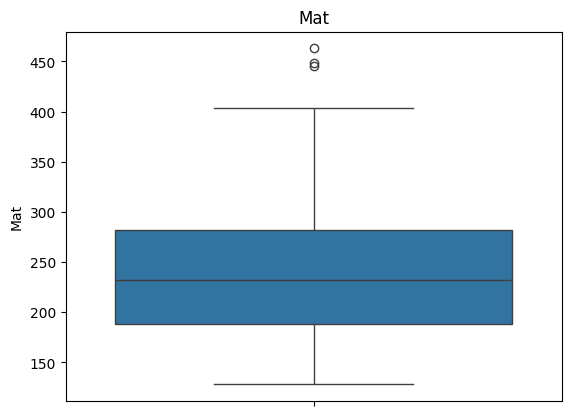

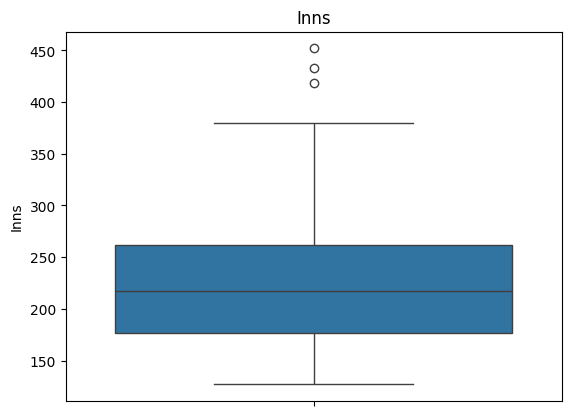

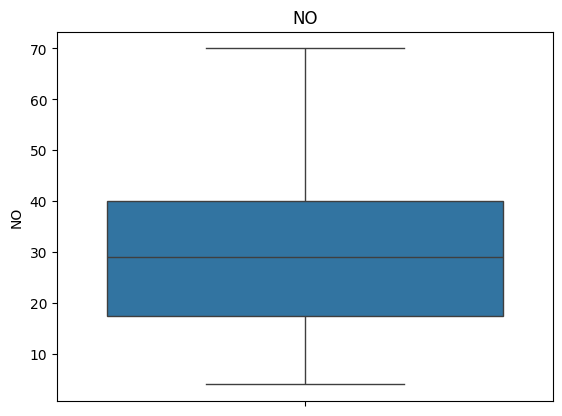

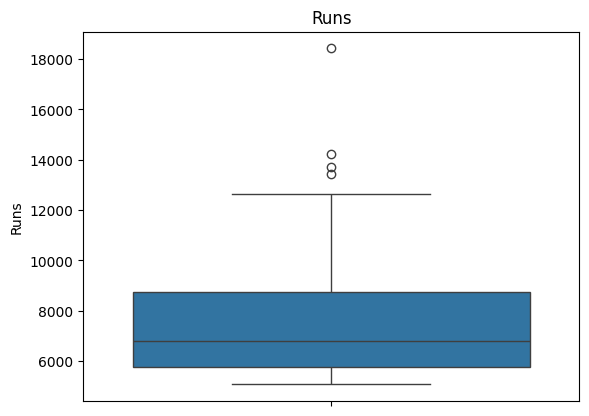

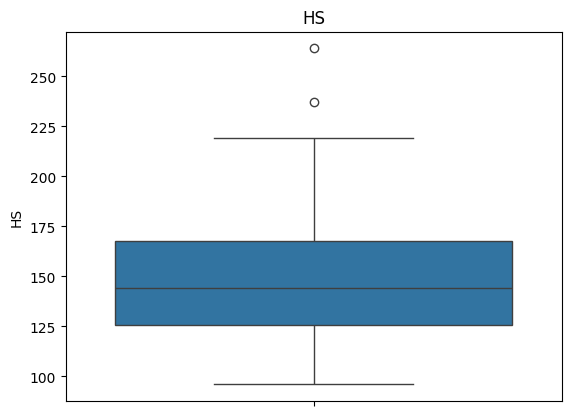

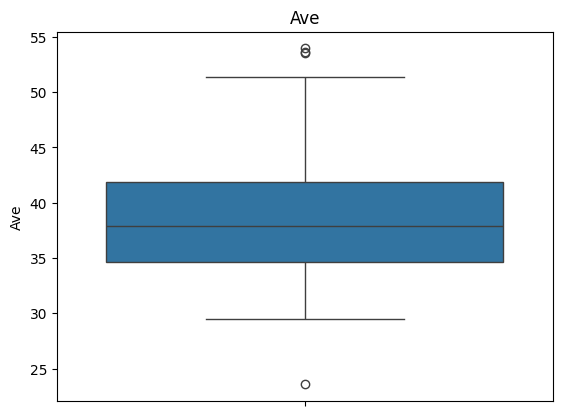

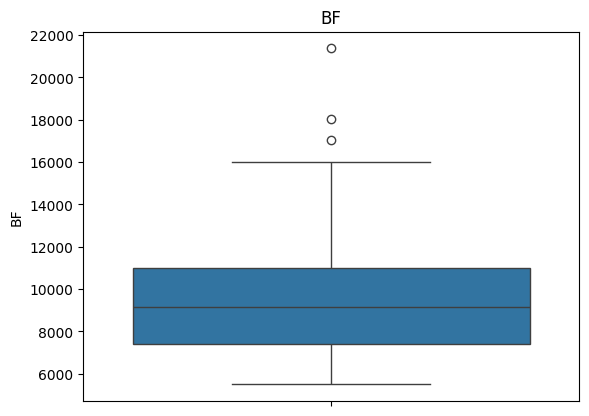

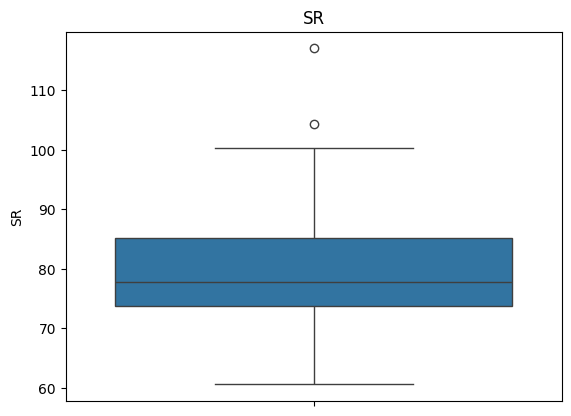

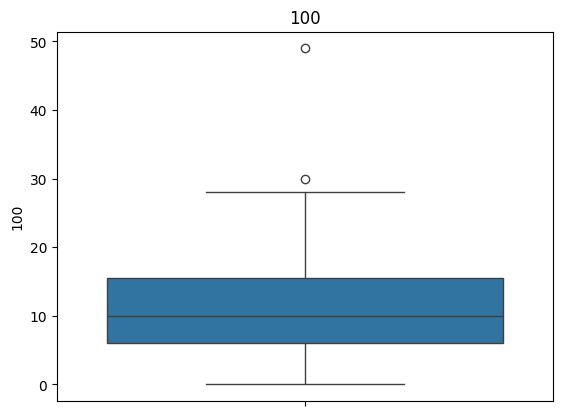

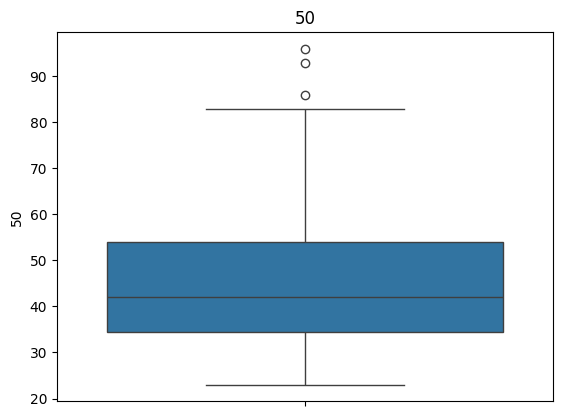

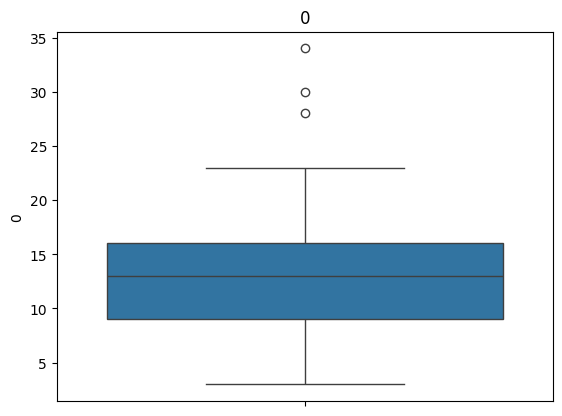

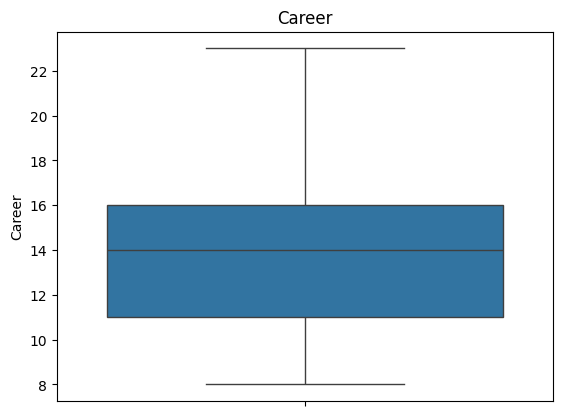

In [ ]:
for x in df.columns:
    if df[x].dtype=='object':
        continue
    sns.boxplot(df[x])
    plt.title(x)
    plt.show()

In our data we have players of all the categories
Batsmen, bowlers and all rounders and with respect to that it's common to have some values as outliers but that doesn't mean we can remove those values.

Let's consider one column Ball Faced(BF)
In this column avg players are facing between 7000-11000 balls now this doesn't prove/mean like the players who are facing more than 15000 balls are outliers.

In our data we have such batsmen as well who faced more than 16000 balls. That's why we are not going to consider those values as outliers.

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


<Axes: >

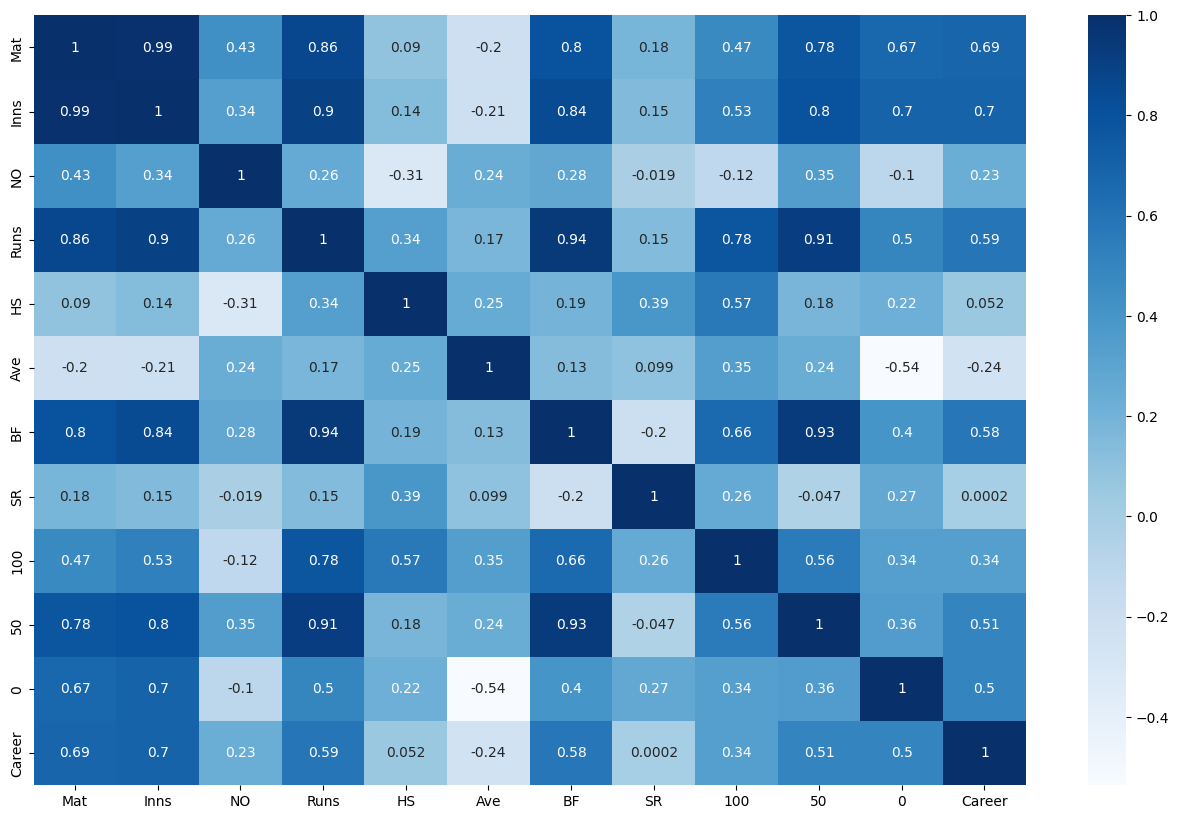

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# We are going to drop the categorical column (Players)

In [ ]:
df_copy.drop(['Player'],axis=1,inplace=True)

In [ ]:
df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# Apply standardization on this df_copy dataframe.
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_copy)

In [ ]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
df_scaled = pd.DataFrame(df_scaled,columns=df_copy.columns)
df_scaled


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


# **K_Means Model Building**

In [ ]:
from sklearn.cluster import KMeans

# **Elbow Method**

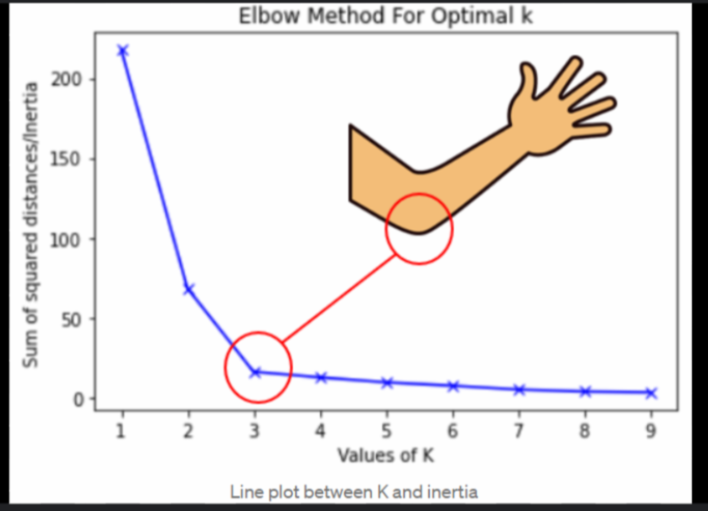

In [ ]:
k_values = [2,3,4,5,6,7]

In [ ]:
ssd = []               # Sum of squared distance/inertia
for x in k_values:
    kmodel = KMeans(n_clusters=x,max_iter=150,random_state=42)
    kmodel.fit(df_scaled)
    ssd.append(kmodel.inertia_)
    print(kmodel.inertia_)

644.840516217269
586.2725236030707
474.16095045677974
439.53342325958914
388.9283315814862
336.01686079526297


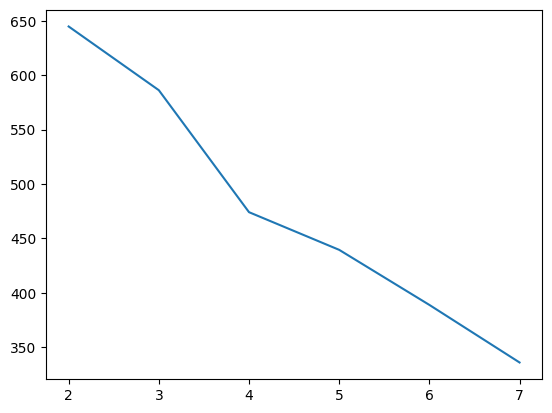

In [ ]:
plt.plot(k_values,ssd)


**From the plot we observed that 4 is the optimal number of clusters**

In [ ]:
kmodel = KMeans(n_clusters=4,max_iter=150,random_state=42)
kmodel.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=42)

In [ ]:
kmodel.labels_   #This will assign each and every player a cluster_id

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 1, 0, 1, 1, 3, 0, 3,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

In [ ]:
df['ClusterID'] = kmodel.labels_

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,1
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,1
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,1


In [ ]:
group_0 = df[df['ClusterID']==0]
group_0

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career,ClusterID
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,0
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,0
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,0
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,0
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0
64,MEK Hussey (AUS),185,157,44,5442,109,48.15,6243,87.16,3,39,3,8,0


In [ ]:
group_1 = df[df['ClusterID']==1]
group_1

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career,ClusterID
36,NJ Astle (NZ),223,217,14,7090,145,34.92,9760,72.64,16,41,19,12,1
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,1
39,G Kirsten (SA),185,185,19,6798,188,40.95,9436,72.04,13,45,11,10,1
40,A Flower (ZIM),213,208,16,6786,145,35.34,9097,74.59,4,55,13,11,1
47,RB Richardson (WI),224,217,30,6248,122,33.41,9801,63.74,5,44,8,13,1
48,WU Tharanga (Asia/SL),204,193,14,6140,174,34.30,8183,75.03,14,34,15,12,1
49,ML Hayden (AUS/ICC),161,155,15,6133,181,43.80,7767,78.96,10,36,9,15,1
51,DM Jones (AUS),164,161,25,6068,145,44.61,8362,72.56,7,46,6,10,1
52,DC Boon (AUS),181,177,16,5964,122,37.04,9157,65.13,5,37,6,11,1
53,JN Rhodes (SA),245,220,51,5935,121,35.11,7336,80.90,2,33,12,11,1


In [ ]:
group_2 = df[df['ClusterID']==2]
group_2

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,2
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,2
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,2
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,2


In [ ]:
group_3 = df[df['ClusterID']==3]
group_3

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Career,ClusterID
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,3
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,3
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,3
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,3
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,3
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,3
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,3
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,3
19,S Chanderpaul (WI),268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,3
20,Yuvraj Singh (Asia/INDIA),304,278,40,8701,150,36.55,9924,87.67,14,52,18,17,3


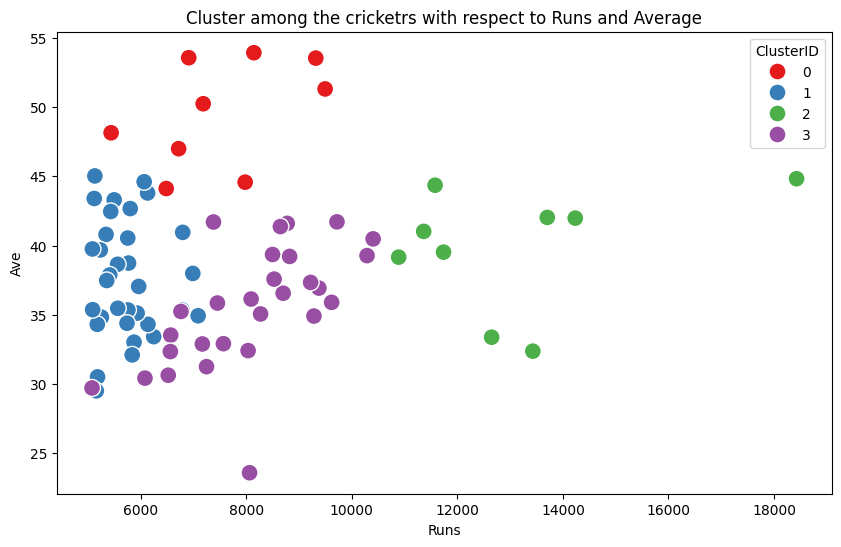

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Runs',y='Ave',hue='ClusterID',palette='Set1',s=150)
plt.title('Cluster among the cricketrs with respect to Runs and Average')
plt.show()

In [ ]:
# ! pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df,x='Runs',y='Ave',z='SR',color='ClusterID',hover_name='Player',title='3d Scatter Plot of Criceters')
fig.update_layout(scene=dict(xaxis_title='Runs',yaxis_title='Average',zaxis_title='Strike Rate'),width=800,height=600)
fig.show()